# Make figure 7

### Load necessary libraries 

In [1]:
import numpy as np
import rasterio
import math
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import geojson
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize

### Load modelling results

In [2]:
with open("/home/sermilik/brunt_model/output_extraction_locations.pkl", "rb") as f1:
    extraction_locations = pickle.load(f1)

f1.close()

#perpendicular angles
west_angle = extraction_locations["west_angle"]
east_angle = extraction_locations["east_angle"]
#extraction points
w_n_x_2020 = extraction_locations["w_n_x_2020"]
w_n_y_2020 = extraction_locations["w_n_y_2020"]
w_s_x_2020 = extraction_locations["w_s_x_2020"]
w_s_y_2020 = extraction_locations["w_s_y_2020"]
e_n_x_2020 = extraction_locations["e_n_x_2020"]
e_n_y_2020 = extraction_locations["e_n_y_2020"]
e_s_x_2020 = extraction_locations["e_s_x_2020"]
e_s_y_2020 = extraction_locations["e_s_y_2020"]

w_n_x_calv = extraction_locations["w_n_x_calv"]
w_n_y_calv = extraction_locations["w_n_y_calv"]
w_s_x_calv = extraction_locations["w_s_x_calv"]
w_s_y_calv = extraction_locations["w_s_y_calv"]
e_n_x_calv = extraction_locations["e_n_x_calv"]
e_n_y_calv = extraction_locations["e_n_y_calv"]
e_s_x_calv = extraction_locations["e_s_x_calv"]
e_s_y_calv = extraction_locations["e_s_y_calv"]

w_n_x_2021 = extraction_locations["w_n_x_2021"]
w_n_y_2021 = extraction_locations["w_n_y_2021"]
w_s_x_2021 = extraction_locations["w_s_x_2021"]
w_s_y_2021 = extraction_locations["w_s_y_2021"]
e_n_x_2021 = extraction_locations["e_n_x_2021"]
e_n_y_2021 = extraction_locations["e_n_y_2021"]
e_s_x_2021 = extraction_locations["e_s_x_2021"]
e_s_y_2021 = extraction_locations["e_s_y_2021"]


In [3]:
with open("./d01_pre_calving/output/inverse_results_2020.pkl", "rb") as f2:
    inverse_results_2020 = pickle.load(f2)

f2.close()

vw_n_pre_x = inverse_results_2020["vw_n_2020_x"]
vw_n_pre_y = inverse_results_2020["vw_n_2020_y"]
vw_s_pre_x = inverse_results_2020["vw_s_2020_x"]
vw_s_pre_y = inverse_results_2020["vw_s_2020_y"]
vw_n_pre_x_rperp = inverse_results_2020["vw_n_2020_x_rperp"]
vw_n_pre_y_rperp = inverse_results_2020["vw_n_2020_y_rperp"]
vw_s_pre_x_rperp = inverse_results_2020["vw_s_2020_x_rperp"]
vw_s_pre_y_rperp = inverse_results_2020["vw_s_2020_y_rperp"]
ve_n_pre_x = inverse_results_2020["ve_n_2020_x"]
ve_n_pre_y = inverse_results_2020["ve_n_2020_y"]
ve_s_pre_x = inverse_results_2020["ve_s_2020_x"]
ve_s_pre_y = inverse_results_2020["ve_s_2020_y"]
ve_n_pre_x_rperp = inverse_results_2020["ve_n_2020_x_rperp"]
ve_n_pre_y_rperp = inverse_results_2020["ve_n_2020_y_rperp"]
ve_s_pre_x_rperp = inverse_results_2020["ve_s_2020_x_rperp"]
ve_s_pre_y_rperp = inverse_results_2020["ve_s_2020_y_rperp"]
    
with open("./d02_calving/output/inverse_results_calve.pkl", "rb") as f3:
    inverse_results_calve = pickle.load(f3)

f3.close()

vw_n_calv_x = inverse_results_calve["vw_n_calv_x"]
vw_n_calv_y = inverse_results_calve["vw_n_calv_y"]
vw_s_calv_x = inverse_results_calve["vw_s_calv_x"]
vw_s_calv_y = inverse_results_calve["vw_s_calv_y"]
vw_n_calv_x_rperp = inverse_results_calve["vw_n_calv_x_rperp"]
vw_n_calv_y_rperp = inverse_results_calve["vw_n_calv_y_rperp"]
vw_s_calv_x_rperp = inverse_results_calve["vw_s_calv_x_rperp"]
vw_s_calv_y_rperp = inverse_results_calve["vw_s_calv_y_rperp"]
ve_n_calv_x = inverse_results_calve["ve_n_calv_x"]
ve_n_calv_y = inverse_results_calve["ve_n_calv_y"]
ve_s_calv_x = inverse_results_calve["ve_s_calv_x"]
ve_s_calv_y = inverse_results_calve["ve_s_calv_y"]
ve_n_calv_x_rperp = inverse_results_calve["ve_n_calv_x_rperp"]
ve_n_calv_y_rperp = inverse_results_calve["ve_n_calv_y_rperp"]
ve_s_calv_x_rperp = inverse_results_calve["ve_s_calv_x_rperp"]
ve_s_calv_y_rperp = inverse_results_calve["ve_s_calv_y_rperp"]    
    
with open("./d03_post_calving/output/inverse_results_2021.pkl", "rb") as f4:
    inverse_results_post = pickle.load(f4)

f4.close()

vw_n_post_x = inverse_results_post["vw_n_2021_x"]
vw_n_post_y = inverse_results_post["vw_n_2021_y"]
vw_s_post_x = inverse_results_post["vw_s_2021_x"]
vw_s_post_y = inverse_results_post["vw_s_2021_y"]
vw_n_post_x_rperp = inverse_results_post["vw_n_2021_x_rperp"]
vw_n_post_y_rperp = inverse_results_post["vw_n_2021_y_rperp"]
vw_s_post_x_rperp = inverse_results_post["vw_s_2021_x_rperp"]
vw_s_post_y_rperp = inverse_results_post["vw_s_2021_y_rperp"]
ve_n_post_x = inverse_results_post["ve_n_2021_x"]
ve_n_post_y = inverse_results_post["ve_n_2021_y"]
ve_s_post_x = inverse_results_post["ve_s_2021_x"]
ve_s_post_y = inverse_results_post["ve_s_2021_y"]
ve_n_post_x_rperp = inverse_results_post["ve_n_2021_x_rperp"]
ve_n_post_y_rperp = inverse_results_post["ve_n_2021_y_rperp"]
ve_s_post_x_rperp = inverse_results_post["ve_s_2021_x_rperp"]
ve_s_post_y_rperp = inverse_results_post["ve_s_2021_y_rperp"]    


### Load outlines

In [4]:
outline_2020 = '/home/sermilik/brunt_model/d01_pre_calving/brunt_HC_2020.geojson'
outline_calv = '/home/sermilik/brunt_model/d02_calving/brunt_HC_2021_calving.geojson'
outline_2021 = '/home/sermilik/brunt_model/d03_post_calving/brunt_HC_2021.geojson'

with open(outline_2020,"r") as outline_file_2020:
    outline_2020 = geojson.load(outline_file_2020)
    
with open(outline_calv,"r") as outline_file_calv:
    outline_calv = geojson.load(outline_file_calv)

with open(outline_2021,"r") as outline_file_2021:
    outline_2021 = geojson.load(outline_file_2021)


### Load shapefiles

In [5]:
fluid_outline_C1  = '/home/sermilik/brunt_model/fluidity_shapefiles/fluidity_chasm1.geojson'
fluid_outline_GZ  = '/home/sermilik/brunt_model/fluidity_shapefiles/fluidity_GZ.geojson'

with open(fluid_outline_C1,"r") as outline_file_C1:
    outline_C1 = geojson.load(outline_file_C1)
    
with open(fluid_outline_GZ,"r") as outline_file_GZ:
    outline_GZ = geojson.load(outline_file_GZ)
    

### Load velocities

In [6]:
#velocity pre
vel_pre_vx_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_velocity_vx_pre_calving_err5_T253_steptol_1Eneg2.tif'
vel_pre_vy_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_velocity_vy_pre_calving_err5_T253_steptol_1Eneg2.tif'
vel_pre_vx_open   = rasterio.open(vel_pre_vx_in)
vel_pre_vy_open   = rasterio.open(vel_pre_vy_in)
vel_pre_vx        = vel_pre_vx_open.read(1)
vel_pre_vy        = vel_pre_vy_open.read(1)
vel_pre_vv        = np.sqrt(vel_pre_vx**2 + vel_pre_vy**2)

#velocity calving
vel_calve_vx_in   = '/home/sermilik/brunt_model/d02_calving/output/model_velocity_vx_calving_err5_T253_steptol_1Eneg2.tif'
vel_calve_vy_in   = '/home/sermilik/brunt_model/d02_calving/output/model_velocity_vy_calving_err5_T253_steptol_1Eneg2.tif'
vel_calve_vx_open = rasterio.open(vel_calve_vx_in)
vel_calve_vy_open = rasterio.open(vel_calve_vy_in)
vel_calve_vx      = vel_calve_vx_open.read(1)
vel_calve_vy      = vel_calve_vy_open.read(1)
vel_calve_vv      = np.sqrt(vel_calve_vx**2 + vel_calve_vy**2)

#velocity post
vel_post_vx_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_velocity_vx_post_calving_err5_T253_steptol_1Eneg2.tif'
vel_post_vy_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_velocity_vy_post_calving_err5_T253_steptol_1Eneg2.tif'
vel_post_vx_open  = rasterio.open(vel_post_vx_in)
vel_post_vy_open  = rasterio.open(vel_post_vy_in)
vel_post_vx       = vel_post_vx_open.read(1)
vel_post_vy       = vel_post_vy_open.read(1)
vel_post_vv       = np.sqrt(vel_post_vx**2 + vel_post_vy**2)

#velocity difference
vel_calve_pre     = vel_calve_vv - vel_pre_vv
vel_calve_pre_pc  = 100 * (vel_calve_vv - vel_pre_vv) / vel_pre_vv
vel_post_pre      = vel_post_vv - vel_pre_vv
vel_post_pre_pc   = 100 * (vel_post_vv - vel_pre_vv) / vel_pre_vv

#angle
angle_pre   = np.zeros(np.shape(vel_pre_vv))
angle_calve = np.zeros(np.shape(vel_calve_vv))
angle_post  = np.zeros(np.shape(vel_post_vv))
#angle_calve_diag = np.zeros(np.shape(vel_calve_diag_vv))
#angle_post_diag  = np.zeros(np.shape(vel_post_diag_vv))

for tx in range(0,np.shape(vel_pre_vv)[1]):
    for ty in range(0,np.shape(vel_pre_vv)[0]):
        vx = vel_pre_vx[ty,tx]
        vy = vel_pre_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_pre[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_pre[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_pre[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_pre[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_pre[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)

for tx in range(0,np.shape(vel_calve_vv)[1]):
    for ty in range(0,np.shape(vel_calve_vv)[0]):
        vx = vel_calve_vx[ty,tx]
        vy = vel_calve_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_calve[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_calve[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_calve[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_calve[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_calve[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)
            
for tx in range(0,np.shape(vel_post_vv)[1]):
    for ty in range(0,np.shape(vel_post_vv)[0]):
        vx = vel_post_vx[ty,tx]
        vy = vel_post_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_post[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_post[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_post[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_post[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_post[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)


angle_calve_pre = -1 * (angle_calve - angle_pre)
angle_post_pre  = -1 * (angle_post - angle_pre)
            


### Load fluidity

In [7]:
#fluidity pre
fluid_pre_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_fluidity_pre_calving_err5_T253_steptol_1Eneg2.tif'
fluid_pre_open   = rasterio.open(fluid_pre_in)
fluid_pre        = fluid_pre_open.read(1)

#fluidity calve
fluid_calve_in   = '/home/sermilik/brunt_model/d02_calving/output/model_fluidity_calving_err5_T253_steptol_1Eneg2.tif'
fluid_calve_open = rasterio.open(fluid_calve_in)
fluid_calve      = fluid_calve_open.read(1)

#fluidity post
fluid_post_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_fluidity_post_calving_err5_T253_steptol_1Eneg2.tif'
fluid_post_open  = rasterio.open(fluid_post_in)
fluid_post       = fluid_post_open.read(1)

fluid_calve_pre  = fluid_calve - fluid_pre
fluid_post_pre   = fluid_post - fluid_pre

fluid_calve_pre_pc  = 100*(fluid_calve - fluid_pre)/fluid_pre
fluid_post_pre_pc   = 100*(fluid_post - fluid_pre)/fluid_pre

print("pre max min")
print(np.nanmax(fluid_pre),np.nanmin(fluid_pre))
print("calve max min")
print(np.nanmax(fluid_calve),np.nanmin(fluid_calve))
print("post max min")
print(np.nanmax(fluid_post),np.nanmin(fluid_post))

print("calve-pre max min")
print(np.nanmax(fluid_calve_pre),np.nanmin(fluid_calve_pre))
print("post-pre max min")
print(np.nanmax(fluid_post_pre),np.nanmin(fluid_post_pre))


pre max min
22572.7675109518 -782.9861985081452
calve max min
22274.31175808932 -387.8173331312522
post max min
13872.76194301905 -12.128234326124144
calve-pre max min
16179.904500031445 -6654.803061470204
post-pre max min
10526.856059065834 -13591.099602790615


### Load strain rate

In [8]:
#pre-calving

#exx_pre
exx_pre_in       = '/home/sermilik/brunt_model/d01_pre_calving/output/model_exx_pre_calving_err5_T253_steptol_1Eneg2.tif'
exx_pre_open     = rasterio.open(exx_pre_in)
exx_pre          = exx_pre_open.read(1)

#exy_pre
exy_pre_in       = '/home/sermilik/brunt_model/d01_pre_calving/output/model_exy_pre_calving_err5_T253_steptol_1Eneg2.tif'
exy_pre_open     = rasterio.open(exy_pre_in)
exy_pre          = exy_pre_open.read(1)

#eyx_pre
eyx_pre_in       = '/home/sermilik/brunt_model/d01_pre_calving/output/model_eyx_pre_calving_err5_T253_steptol_1Eneg2.tif'
eyx_pre_open     = rasterio.open(eyx_pre_in)
eyx_pre          = eyx_pre_open.read(1)

#eyy_pre
eyy_pre_in       = '/home/sermilik/brunt_model/d01_pre_calving/output/model_eyy_pre_calving_err5_T253_steptol_1Eneg2.tif'
eyy_pre_open     = rasterio.open(eyy_pre_in)
eyy_pre          = eyy_pre_open.read(1)


In [9]:
#calve

#exx_calve
exx_calve_in       = '/home/sermilik/brunt_model/d02_calving/output/model_exx_calving_err5_T253_steptol_1Eneg2.tif'
exx_calve_open     = rasterio.open(exx_calve_in)
exx_calve          = exx_calve_open.read(1)

#exy_calve
exy_calve_in       = '/home/sermilik/brunt_model/d02_calving/output/model_exy_calving_err5_T253_steptol_1Eneg2.tif'
exy_calve_open     = rasterio.open(exy_calve_in)
exy_calve          = exy_calve_open.read(1)

#eyx_calve
eyx_calve_in       = '/home/sermilik/brunt_model/d02_calving/output/model_eyx_calving_err5_T253_steptol_1Eneg2.tif'
eyx_calve_open     = rasterio.open(eyx_calve_in)
eyx_calve          = eyx_calve_open.read(1)

#eyy_calve
eyy_calve_in       = '/home/sermilik/brunt_model/d02_calving/output/model_eyy_calving_err5_T253_steptol_1Eneg2.tif'
eyy_calve_open     = rasterio.open(eyy_calve_in)
eyy_calve          = eyy_calve_open.read(1)


In [10]:
#post-calving

#exx_post
exx_post_in       = '/home/sermilik/brunt_model/d03_post_calving/output/model_exx_post_calving_err5_T253_steptol_1Eneg2.tif'
exx_post_open     = rasterio.open(exx_post_in)
exx_post          = exx_post_open.read(1)

#exy_post
exy_post_in       = '/home/sermilik/brunt_model/d03_post_calving/output/model_exy_post_calving_err5_T253_steptol_1Eneg2.tif'
exy_post_open     = rasterio.open(exy_post_in)
exy_post          = exy_post_open.read(1)

#eyx_post
eyx_post_in       = '/home/sermilik/brunt_model/d03_post_calving/output/model_eyx_post_calving_err5_T253_steptol_1Eneg2.tif'
eyx_post_open     = rasterio.open(eyx_post_in)
eyx_post          = eyx_post_open.read(1)

#eyy_post
eyy_post_in       = '/home/sermilik/brunt_model/d03_post_calving/output/model_eyy_post_calving_err5_T253_steptol_1Eneg2.tif'
eyy_post_open     = rasterio.open(eyy_post_in)
eyy_post          = eyy_post_open.read(1)


### calculate deviatoric stress

In [11]:
#pre #MPa to KPa
tauxx_pre = (np.cbrt(2*exx_pre / fluid_pre))*1000
tauxy_pre = (np.cbrt(2*exy_pre / fluid_pre))*1000
tauyx_pre = (np.cbrt(2*eyx_pre / fluid_pre))*1000
tauyy_pre = (np.cbrt(2*eyy_pre / fluid_pre))*1000

In [12]:
#calving
tauxx_calve = (np.cbrt(2*exx_calve / fluid_calve))*1000
tauxy_calve = (np.cbrt(2*exy_calve / fluid_calve))*1000
tauyx_calve = (np.cbrt(2*eyx_calve / fluid_calve))*1000
tauyy_calve = (np.cbrt(2*eyy_calve / fluid_calve))*1000

In [13]:
#post
tauxx_post = (np.cbrt(2*exx_post / fluid_post))*1000
tauxy_post = (np.cbrt(2*exy_post / fluid_post))*1000
tauyx_post = (np.cbrt(2*eyx_post / fluid_post))*1000
tauyy_post = (np.cbrt(2*eyy_post / fluid_post))*1000

### Load Landsat

In [14]:
#pre-calving Landsat-8

landsat_B2_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B2_merge_crop.tif"
landsat_B3_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B3_merge_crop.tif"
landsat_B4_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B4_merge_crop.tif"

landsat_B2_pre_merged = rasterio.open(landsat_B2_pre_out)
landsat_B3_pre_merged = rasterio.open(landsat_B3_pre_out)   
landsat_B4_pre_merged = rasterio.open(landsat_B4_pre_out)    

ls_B2_pre_merged = landsat_B2_pre_merged.read(1)
ls_B2_pre_merged[ls_B2_pre_merged > np.percentile(ls_B2_pre_merged,99)] = np.percentile(ls_B2_pre_merged,99)
ls_B3_pre_merged = landsat_B3_pre_merged.read(1)
ls_B3_pre_merged[ls_B3_pre_merged > np.percentile(ls_B3_pre_merged,99)] = np.percentile(ls_B3_pre_merged,99)   
ls_B4_pre_merged = landsat_B4_pre_merged.read(1)
ls_B4_pre_merged[ls_B4_pre_merged > np.percentile(ls_B4_pre_merged,99)] = np.percentile(ls_B4_pre_merged,99)    

ls_pre_merged = np.array([ls_B4_pre_merged, ls_B3_pre_merged, ls_B2_pre_merged]).transpose(1,2,0)
ls_pre_merged_norm = (ls_pre_merged * (255 / np.max(ls_pre_merged))).astype(np.uint8)


In [15]:
#calving Sentinel-2

sentinel_out_B2_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B2_ps_merge_crop.tif'
sentinel_out_B3_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B3_ps_merge_crop.tif'
sentinel_out_B4_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B4_ps_merge_crop.tif'
              
img1_2 = rasterio.open(sentinel_out_B2_ps)
img1_3 = rasterio.open(sentinel_out_B3_ps)
img1_4 = rasterio.open(sentinel_out_B4_ps)

#crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_4, image1_3, image1_2]).transpose(1,2,0)
s2_calve_norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)


In [16]:
#post-calving Landsat-8

landsat_B2_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B2_merge_crop.tif"
landsat_B3_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B3_merge_crop.tif"
landsat_B4_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B4_merge_crop.tif"

landsat_B2_post_merged = rasterio.open(landsat_B2_post_out)
landsat_B3_post_merged = rasterio.open(landsat_B3_post_out)   
landsat_B4_post_merged = rasterio.open(landsat_B4_post_out)    

ls_B2_post_merged = landsat_B2_post_merged.read(1)
ls_B2_post_merged[ls_B2_post_merged > np.percentile(ls_B2_post_merged,99)] = np.percentile(ls_B2_post_merged,99)
ls_B3_post_merged = landsat_B3_post_merged.read(1)
ls_B3_post_merged[ls_B3_post_merged > np.percentile(ls_B3_post_merged,99)] = np.percentile(ls_B3_post_merged,99)   
ls_B4_post_merged = landsat_B4_post_merged.read(1)
ls_B4_post_merged[ls_B4_post_merged > np.percentile(ls_B4_post_merged,99)] = np.percentile(ls_B4_post_merged,99)    

ls_post_merged = np.array([ls_B4_post_merged, ls_B3_post_merged, ls_B2_post_merged]).transpose(1,2,0)
ls_post_merged_norm = (ls_post_merged * (255 / np.max(ls_post_merged))).astype(np.uint8)


### calculate principal stresses

In [17]:
tifxmin = -750000
tifxmax = -600000
tifymin = 1350000
tifymax = 1500000
tifres = 100 #250

tifxlen = (tifxmax-tifxmin)/tifres
tifylen = (tifymax-tifymin)/tifres

tifx = np.linspace(tifxmin+(tifres/2),tifxmax-(tifres/2),num=int(tifxlen))
tify = np.linspace(tifymax-(tifres/2),tifymin+(tifres/2),num=int(tifylen))


In [18]:
# maximum value
ds_max_val = 200

ds_theta_pre   = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_pre_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_pre_neg = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_pre_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_pre_neg = np.zeros((int(tifxlen),int(tifylen)))

ds_theta_calve   = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_calve_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_calve_neg = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_calve_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_calve_neg = np.zeros((int(tifxlen),int(tifylen)))

ds_theta_post   = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_post_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_1st_post_neg = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_post_pos = np.zeros((int(tifxlen),int(tifylen)))
ds_2nd_post_neg = np.zeros((int(tifxlen),int(tifylen)))


for tx in range(0,int(tifxlen)):
    for ty in range(0,int(tifylen)):

        #pre
        ds_theta_pre_xy = np.arctan((2 * tauxy_pre[tx,ty])/(tauxx_pre[tx,ty] - tauyy_pre[tx,ty])) / 2
        
        ds_theta_pre[tx,ty] = ds_theta_pre_xy

        if ~np.isnan(tauxx_pre[tx,ty]):

            ds_1st_pre = ((tauxx_pre[tx,ty]*np.cos(ds_theta_pre[tx,ty]) + tauyx_pre[tx,ty]*np.sin(ds_theta_pre[tx,ty]))*np.cos(ds_theta_pre[tx,ty])) + \
                        ((tauxy_pre[tx,ty]*np.cos(ds_theta_pre[tx,ty]) + tauyy_pre[tx,ty]*np.sin(ds_theta_pre[tx,ty]))*np.sin(ds_theta_pre[tx,ty]))
        
            ds_2nd_pre = (((-1*tauxx_pre[tx,ty]*np.sin(ds_theta_pre[tx,ty])) + tauyx_pre[tx,ty]*np.cos(ds_theta_pre[tx,ty]))*(-1*np.sin(ds_theta_pre[tx,ty]))) + \
                        (((-1*tauxy_pre[tx,ty]*np.sin(ds_theta_pre[tx,ty])) + tauyy_pre[tx,ty]*np.cos(ds_theta_pre[tx,ty]))*np.cos(ds_theta_pre[tx,ty]))

            if (ds_1st_pre > -1*ds_max_val) & (ds_1st_pre < ds_max_val) & (ds_2nd_pre > -1*ds_max_val) & (ds_2nd_pre < ds_max_val):
        
                if ds_1st_pre > 0:
                    ds_1st_pre_pos[tx,ty] = ds_1st_pre
                else:
                    ds_1st_pre_neg[tx,ty] = ds_1st_pre

                if ds_2nd_pre > 0:
                    ds_2nd_pre_pos[tx,ty] = ds_2nd_pre
                else:
                    ds_2nd_pre_neg[tx,ty] = ds_2nd_pre
        
        #calve
        ds_theta_calve_xy = np.arctan((2 * tauxy_calve[tx,ty])/(tauxx_calve[tx,ty] - tauyy_calve[tx,ty])) / 2
        
        ds_theta_calve[tx,ty] = ds_theta_calve_xy

        if ~np.isnan(tauxx_calve[tx,ty]):

            ds_1st_calve = ((tauxx_calve[tx,ty]*np.cos(ds_theta_calve[tx,ty]) + tauyx_calve[tx,ty]*np.sin(ds_theta_calve[tx,ty]))*np.cos(ds_theta_calve[tx,ty])) + \
                        ((tauxy_calve[tx,ty]*np.cos(ds_theta_calve[tx,ty]) + tauyy_calve[tx,ty]*np.sin(ds_theta_calve[tx,ty]))*np.sin(ds_theta_calve[tx,ty]))
        
            ds_2nd_calve = (((-1*tauxx_calve[tx,ty]*np.sin(ds_theta_calve[tx,ty])) + tauyx_calve[tx,ty]*np.cos(ds_theta_calve[tx,ty]))*(-1*np.sin(ds_theta_calve[tx,ty]))) + \
                        (((-1*tauxy_calve[tx,ty]*np.sin(ds_theta_calve[tx,ty])) + tauyy_calve[tx,ty]*np.cos(ds_theta_calve[tx,ty]))*np.cos(ds_theta_calve[tx,ty]))

            if (ds_1st_calve > -1*ds_max_val) & (ds_1st_calve < ds_max_val) & (ds_2nd_calve > -1*ds_max_val) & (ds_2nd_calve < ds_max_val):
        
                if ds_1st_calve > 0:
                    ds_1st_calve_pos[tx,ty] = ds_1st_calve
                else:
                    ds_1st_calve_neg[tx,ty] = ds_1st_calve

                if ds_2nd_calve > 0:
                    ds_2nd_calve_pos[tx,ty] = ds_2nd_calve
                else:
                    ds_2nd_calve_neg[tx,ty] = ds_2nd_calve

        #post
        ds_theta_post_xy = np.arctan((2 * tauxy_post[tx,ty])/(tauxx_post[tx,ty] - tauyy_post[tx,ty])) / 2
        
        ds_theta_post[tx,ty] = ds_theta_post_xy

        if ~np.isnan(tauxx_post[tx,ty]):

            ds_1st_post = ((tauxx_post[tx,ty]*np.cos(ds_theta_post[tx,ty]) + tauyx_post[tx,ty]*np.sin(ds_theta_post[tx,ty]))*np.cos(ds_theta_post[tx,ty])) + \
                        ((tauxy_post[tx,ty]*np.cos(ds_theta_post[tx,ty]) + tauyy_post[tx,ty]*np.sin(ds_theta_post[tx,ty]))*np.sin(ds_theta_post[tx,ty]))
        
            ds_2nd_post = (((-1*tauxx_post[tx,ty]*np.sin(ds_theta_post[tx,ty])) + tauyx_post[tx,ty]*np.cos(ds_theta_post[tx,ty]))*(-1*np.sin(ds_theta_post[tx,ty]))) + \
                        (((-1*tauxy_post[tx,ty]*np.sin(ds_theta_post[tx,ty])) + tauyy_post[tx,ty]*np.cos(ds_theta_post[tx,ty]))*np.cos(ds_theta_post[tx,ty]))

            if (ds_1st_post > -1*ds_max_val) & (ds_1st_post < ds_max_val) & (ds_2nd_post > -1*ds_max_val) & (ds_2nd_post < ds_max_val):
        
                if ds_1st_post > 0:
                    ds_1st_post_pos[tx,ty] = ds_1st_post
                else:
                    ds_1st_post_neg[tx,ty] = ds_1st_post

                if ds_2nd_post > 0:
                    ds_2nd_post_pos[tx,ty] = ds_2nd_post
                else:
                    ds_2nd_post_neg[tx,ty] = ds_2nd_post


In [19]:
ds_1st_pre_pos[ds_1st_pre_pos==0] = np.nan
ds_1st_pre_neg[ds_1st_pre_neg==0] = np.nan
ds_2nd_pre_pos[ds_2nd_pre_pos==0] = np.nan
ds_2nd_pre_neg[ds_2nd_pre_neg==0] = np.nan

ds_1st_calve_pos[ds_1st_calve_pos==0] = np.nan
ds_1st_calve_neg[ds_1st_calve_neg==0] = np.nan
ds_2nd_calve_pos[ds_2nd_calve_pos==0] = np.nan
ds_2nd_calve_neg[ds_2nd_calve_neg==0] = np.nan

ds_1st_post_pos[ds_1st_post_pos==0] = np.nan
ds_1st_post_neg[ds_1st_post_neg==0] = np.nan
ds_2nd_post_pos[ds_2nd_post_pos==0] = np.nan
ds_2nd_post_neg[ds_2nd_post_neg==0] = np.nan

### Plot model figure

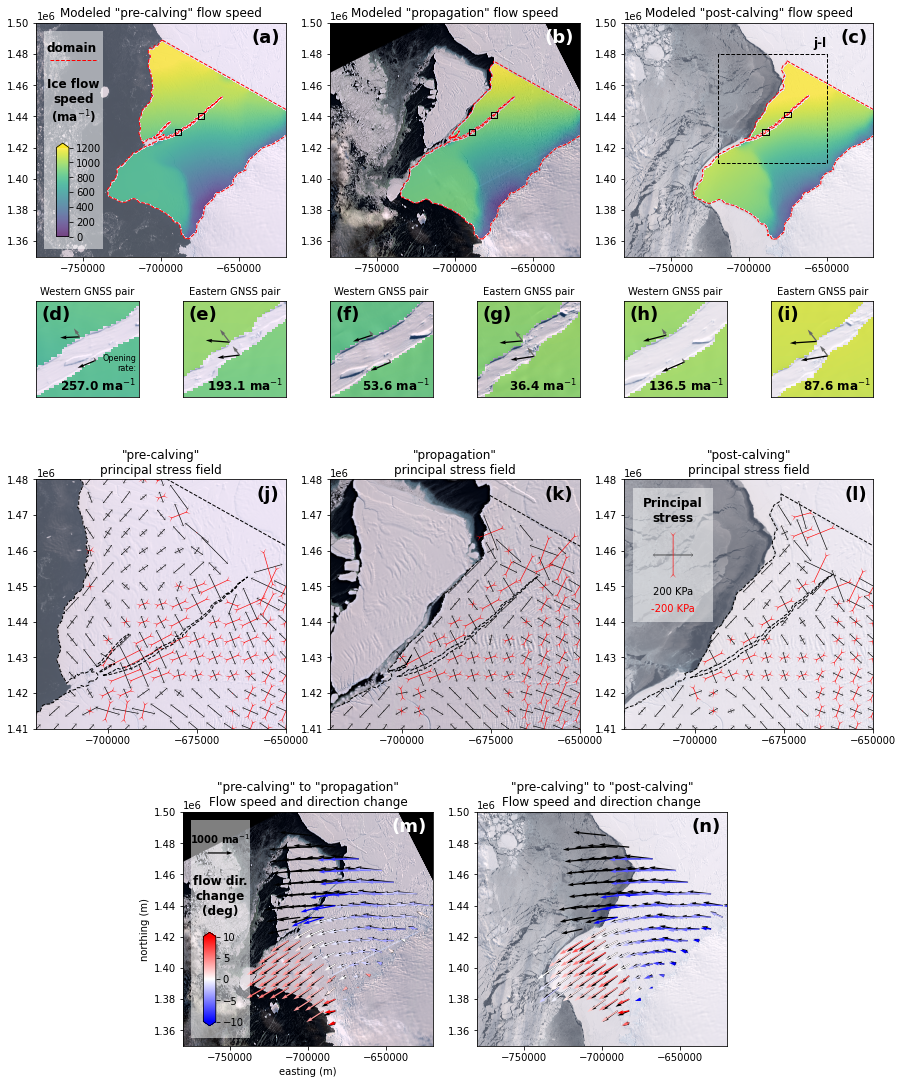

In [20]:

gr = 0.4
vvmin = 0
vvmax = 1200
    
Amin = -500
Amax = 500

xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

xmin_hc = -720000
xmax_hc = -650000
ymin_hc = 1410000 
ymax_hc = 1480000

fig = plt.figure(figsize=(15, 19.5))

gs = gridspec.GridSpec(23, 18, wspace=10) #0.4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:6,0:6])
hidden_vel = ax1.imshow(vel_pre_vv, alpha=0.75, vmin=vvmin, vmax=vvmax)
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax1)
show(vel_pre_vv,ax=ax1,transform=vel_pre_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax1.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax1.add_patch(Rectangle((-775000,1355000),37500,140000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes0 = inset_axes(ax1, width="5%", height="40%",loc='lower left',borderpad=2)
cbar0 = plt.colorbar(hidden_vel,cax=cbaxes0, ticks=[0,200,400,600,800,1000,1200],extend='max')        
ax1.annotate("Ice flow\nspeed\n(ma$^{-1}$)",(-756250,1465000),size=12,weight='bold',ha='center',va='top')

ax1.plot([-775000+(37500/2)-15000,-775000+(37500/2)+15000],[1476000,1476000],linewidth=1, color='r', linestyle='--')
ax1.annotate("domain",(-775000+(35000/2),1488000),size=12,weight='bold',ha='center',va='top')

ax2 = plt.subplot(gs[0:6,6:12])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax2)
show(vel_calve_vv,ax=ax2,transform=vel_calve_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax2.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax3 = plt.subplot(gs[0:6,12:18])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax3)
show(vel_post_vv,ax=ax3,transform=vel_post_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax3.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax3.plot([xmin_hc,xmin_hc,xmax_hc,xmax_hc,xmin_hc],\
        [ymin_hc,ymax_hc,ymax_hc,ymin_hc,ymin_hc],\
        '--',color='k',linewidth=1)

ax3.annotate("j-l",(xmax_hc,ymax_hc+2500),size=12,weight='bold',ha='right',va='bottom')


#--------------------------------------------------
ax4 = plt.subplot(gs[6:9,0:3])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax4)
show(vel_pre_vv,ax=ax4,transform=vel_pre_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

w_ns_x_average_2020 = (w_n_x_2020 + w_s_x_2020) / 2
w_ns_y_average_2020 = (w_n_y_2020 + w_s_y_2020) / 2

xmin_w_pre = w_ns_x_average_2020 - 2000
xmax_w_pre = w_ns_x_average_2020 + 2000
ymin_w_pre = w_ns_y_average_2020 - 1875
ymax_w_pre = w_ns_y_average_2020 + 1875

ax1.plot([xmin_w_pre,xmin_w_pre,xmax_w_pre,xmax_w_pre,xmin_w_pre],\
            [ymin_w_pre,ymax_w_pre,ymax_w_pre,ymin_w_pre,ymin_w_pre],\
            color='k',linewidth=1)

mscale_mini = 4167 #2667
mwidth_mini = 0.0125
Q_vw_n_pre = ax4.quiver(w_n_x_2020,w_n_y_2020,vw_n_pre_x,vw_n_pre_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_s_pre = ax4.quiver(w_s_x_2020,w_s_y_2020,vw_s_pre_x,vw_s_pre_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_n_pre_rperp = ax4.quiver(w_n_x_2020,w_n_y_2020,vw_n_pre_x_rperp,vw_n_pre_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_vw_s_pre_rperp = ax4.quiver(w_s_x_2020,w_s_y_2020,vw_s_pre_x_rperp,vw_s_pre_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)

ax5 = plt.subplot(gs[6:9,3:6])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax5)
show(vel_pre_vv,ax=ax5,transform=vel_pre_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

e_ns_x_average_2020 = (e_n_x_2020 + e_s_x_2020) / 2
e_ns_y_average_2020 = (e_n_y_2020 + e_s_y_2020) / 2

xmin_e_pre = e_ns_x_average_2020 - 2000
xmax_e_pre = e_ns_x_average_2020 + 2000
ymin_e_pre = e_ns_y_average_2020 - 1875
ymax_e_pre = e_ns_y_average_2020 + 1875

ax1.plot([xmin_e_pre,xmin_e_pre,xmax_e_pre,xmax_e_pre,xmin_e_pre],\
            [ymin_e_pre,ymax_e_pre,ymax_e_pre,ymin_e_pre,ymin_e_pre],\
            color='k',linewidth=1)

Q_ve_n_pre = ax5.quiver(e_n_x_2020,e_n_y_2020,ve_n_pre_x,ve_n_pre_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_s_pre = ax5.quiver(e_s_x_2020,e_s_y_2020,ve_s_pre_x,ve_s_pre_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_n_pre_rperp = ax5.quiver(e_n_x_2020,e_n_y_2020,ve_n_pre_x_rperp,ve_n_pre_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_ve_s_pre_rperp = ax5.quiver(e_s_x_2020,e_s_y_2020,ve_s_pre_x_rperp,ve_s_pre_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)

ax6 = plt.subplot(gs[6:9,6:9])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax6)
show(vel_calve_vv,ax=ax6,transform=vel_calve_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

w_ns_x_average_calv = (w_n_x_calv + w_s_x_calv) / 2
w_ns_y_average_calv = (w_n_y_calv + w_s_y_calv) / 2

xmin_w_calv = w_ns_x_average_calv - 2000
xmax_w_calv = w_ns_x_average_calv + 2000
ymin_w_calv = w_ns_y_average_calv - 1875
ymax_w_calv = w_ns_y_average_calv + 1875

ax2.plot([xmin_w_calv,xmin_w_calv,xmax_w_calv,xmax_w_calv,xmin_w_calv],\
            [ymin_w_calv,ymax_w_calv,ymax_w_calv,ymin_w_calv,ymin_w_calv],\
            color='k',linewidth=1)

Q_vw_n_calv = ax6.quiver(w_n_x_calv,w_n_y_calv,vw_n_calv_x,vw_n_calv_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_s_calv = ax6.quiver(w_s_x_calv,w_s_y_calv,vw_s_calv_x,vw_s_calv_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_n_calv_rperp = ax6.quiver(w_n_x_calv,w_n_y_calv,vw_n_calv_x_rperp,vw_n_calv_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_vw_s_calv_rperp = ax6.quiver(w_s_x_calv,w_s_y_calv,vw_s_calv_x_rperp,vw_s_calv_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)

ax7 = plt.subplot(gs[6:9,9:12])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax7)
show(vel_calve_vv,ax=ax7,transform=vel_calve_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

e_ns_x_average_calv = (e_n_x_calv + e_s_x_calv) / 2
e_ns_y_average_calv = (e_n_y_calv + e_s_y_calv) / 2

xmin_e_calv = e_ns_x_average_calv - 2000
xmax_e_calv = e_ns_x_average_calv + 2000
ymin_e_calv = e_ns_y_average_calv - 1875
ymax_e_calv = e_ns_y_average_calv + 1875

ax2.plot([xmin_e_calv,xmin_e_calv,xmax_e_calv,xmax_e_calv,xmin_e_calv],\
            [ymin_e_calv,ymax_e_calv,ymax_e_calv,ymin_e_calv,ymin_e_calv],\
            color='k',linewidth=1)

Q_ve_n_calv = ax7.quiver(e_n_x_calv,e_n_y_calv,ve_n_calv_x,ve_n_calv_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_s_calv = ax7.quiver(e_s_x_calv,e_s_y_calv,ve_s_calv_x,ve_s_calv_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_n_calv_rperp = ax7.quiver(e_n_x_calv,e_n_y_calv,ve_n_calv_x_rperp,ve_n_calv_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_ve_s_calv_rperp = ax7.quiver(e_s_x_calv,e_s_y_calv,ve_s_calv_x_rperp,ve_s_calv_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)

ax8 = plt.subplot(gs[6:9,12:15])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax8)
show(vel_post_vv,ax=ax8,transform=vel_post_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

w_ns_x_average_2021 = (w_n_x_2021 + w_s_x_2021) / 2
w_ns_y_average_2021 = (w_n_y_2021 + w_s_y_2021) / 2

xmin_w_post = w_ns_x_average_2021 - 2000
xmax_w_post = w_ns_x_average_2021 + 2000
ymin_w_post = w_ns_y_average_2021 - 1875
ymax_w_post = w_ns_y_average_2021 + 1875

ax3.plot([xmin_w_post,xmin_w_post,xmax_w_post,xmax_w_post,xmin_w_post],\
            [ymin_w_post,ymax_w_post,ymax_w_post,ymin_w_post,ymin_w_post],\
            color='k',linewidth=1)

Q_vw_n_post = ax8.quiver(w_n_x_2021,w_n_y_2021,vw_n_post_x,vw_n_post_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_s_post = ax8.quiver(w_s_x_2021,w_s_y_2021,vw_s_post_x,vw_s_post_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_vw_n_post_rperp = ax8.quiver(w_n_x_2021,w_n_y_2021,vw_n_post_x_rperp,vw_n_post_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_vw_s_post_rperp = ax8.quiver(w_s_x_2021,w_s_y_2021,vw_s_post_x_rperp,vw_s_post_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)

ax9 = plt.subplot(gs[6:9,15:18])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax9)
show(vel_post_vv,ax=ax9,transform=vel_post_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

e_ns_x_average_2021 = (e_n_x_2021 + e_s_x_2021) / 2
e_ns_y_average_2021 = (e_n_y_2021 + e_s_y_2021) / 2

xmin_e_post = e_ns_x_average_2021 - 2000
xmax_e_post = e_ns_x_average_2021 + 2000
ymin_e_post = e_ns_y_average_2021 - 1875
ymax_e_post = e_ns_y_average_2021 + 1875

ax3.plot([xmin_e_post,xmin_e_post,xmax_e_post,xmax_e_post,xmin_e_post],\
            [ymin_e_post,ymax_e_post,ymax_e_post,ymin_e_post,ymin_e_post],\
            color='k',linewidth=1)

Q_ve_n_post = ax9.quiver(e_n_x_2021,e_n_y_2021,ve_n_post_x,ve_n_post_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_s_post = ax9.quiver(e_s_x_2021,e_s_y_2021,ve_s_post_x,ve_s_post_y,scale = mscale_mini, color='k', width=mwidth_mini)
Q_ve_n_post_rperp = ax9.quiver(e_n_x_2021,e_n_y_2021,ve_n_post_x_rperp,ve_n_post_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)
Q_ve_s_post_rperp = ax9.quiver(e_s_x_2021,e_s_y_2021,ve_s_post_x_rperp,ve_s_post_y_rperp,scale = mscale_mini, color=[gr,gr,gr], width=mwidth_mini)


#--------------------------------------------------

sskip=50 #50
smscale = 2500
smwidth = 0.0025

smx = np.linspace(exx_pre_open.transform[2],exx_pre_open.transform[2]+(exx_pre_open.transform[0]*np.shape(exx_pre)[0]),num=np.shape(exx_pre)[0])
smy = np.linspace(exx_pre_open.transform[5],exx_pre_open.transform[5]+(exx_pre_open.transform[4]*np.shape(exx_pre)[1]),num=np.shape(exx_pre)[1])
sxmesh,symesh = np.meshgrid(smx,smy)


ax10 = plt.subplot(gs[10:16,0:6])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax10)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax10.plot(xs[:, 0], xs[:, 1], linewidth=1, color='k', linestyle='--')

#pre 1st
Q_ds_1st_pre_pos1 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_pre_pos[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]), ds_1st_pre_pos[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_pre_pos2 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_pre_pos[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]), -ds_1st_pre_pos[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_pre_neg1 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_pre_neg[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]), ds_1st_pre_neg[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_1st_pre_neg2 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_pre_neg[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]), -ds_1st_pre_neg[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

#pre 2nd
Q_ds_2nd_pre_pos1 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_pre_pos[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_pre_pos[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_pre_pos2 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_pre_pos[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_pre_pos[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_pre_neg1 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_pre_neg[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_pre_neg[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_2nd_pre_neg2 = ax10.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_pre_neg[ ::sskip, ::sskip]*np.cos(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_pre_neg[ ::sskip, ::sskip]*np.sin(ds_theta_pre[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)


ax11 = plt.subplot(gs[10:16,6:12])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax11)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax11.plot(xs[:, 0], xs[:, 1], linewidth=1, color='k', linestyle='--')

#calve 1st
Q_ds_1st_calve_pos1 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_calve_pos[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]), ds_1st_calve_pos[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_calve_pos2 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_calve_pos[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]), -ds_1st_calve_pos[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_calve_neg1 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_calve_neg[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]), ds_1st_calve_neg[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_1st_calve_neg2 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_calve_neg[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]), -ds_1st_calve_neg[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

#calve 2nd
Q_ds_2nd_calve_pos1 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_calve_pos[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_calve_pos[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_calve_pos2 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_calve_pos[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_calve_pos[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_calve_neg1 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_calve_neg[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_calve_neg[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_2nd_calve_neg2 = ax11.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_calve_neg[ ::sskip, ::sskip]*np.cos(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_calve_neg[ ::sskip, ::sskip]*np.sin(ds_theta_calve[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)


ax12 = plt.subplot(gs[10:16,12:18])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax12)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax12.plot(xs[:, 0], xs[:, 1], linewidth=1, color='k', linestyle='--')

#post 1st
Q_ds_1st_post_pos1 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_post_pos[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]), ds_1st_post_pos[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_post_pos2 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_post_pos[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]), -ds_1st_post_pos[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_1st_post_neg1 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_1st_post_neg[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]), ds_1st_post_neg[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_1st_post_neg2 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_1st_post_neg[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]), -ds_1st_post_neg[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

#post 2nd
Q_ds_2nd_post_pos1 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_post_pos[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_post_pos[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_post_pos2 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_post_pos[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_post_pos[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)

Q_ds_2nd_post_neg1 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    ds_2nd_post_neg[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))), ds_2nd_post_neg[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

Q_ds_2nd_post_neg2 = ax12.quiver(sxmesh[ ::sskip, ::sskip],symesh[ ::sskip, ::sskip],
                    -ds_2nd_post_neg[ ::sskip, ::sskip]*np.cos(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))), -ds_2nd_post_neg[ ::sskip, ::sskip]*np.sin(ds_theta_post[ ::sskip, ::sskip]+(math.radians(90))),
                    scale = smscale, color='r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)


ax12.add_patch(Rectangle((-717500,1440000),22500,37500,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
ax12.quiver([-706250, -706250], [1458750,1458750], [200,-200], [0,0], scale = smscale, color = 'k', width= smwidth, headlength =5, headaxislength=1, headwidth=10)
ax12.quiver([-706250, -706250], [1458750,1458750], [0,0], [-200,200], scale = smscale, color = 'r', width= smwidth, headlength =-5, headaxislength=1, headwidth=10)

ax12.annotate("Principal\nstress",(-706250,1475000),size=12,weight='bold',ha='center',va='top')
ax12.annotate("200 KPa",(-706250,1450000),size=10,color='k',ha='center',va='top')
ax12.annotate("-200 KPa",(-706250,1445000),size=10,color='r',ha='center',va='top')


#--------------------------------------------------

ang_diff_thres = 10
skip=75
mscale = 10000
mwidth = 0.005

mx = np.linspace(vel_pre_vx_open.transform[2],vel_pre_vx_open.transform[2]+(vel_pre_vx_open.transform[0]*np.shape(vel_pre_vx)[0]),num=np.shape(vel_pre_vx)[0])
my = np.linspace(vel_pre_vx_open.transform[5],vel_pre_vx_open.transform[5]+(vel_pre_vx_open.transform[4]*np.shape(vel_pre_vx)[1]),num=np.shape(vel_pre_vx)[1])
xmesh,ymesh = np.meshgrid(mx,my)

ax13 = plt.subplot(gs[17:23,3:9])
image_hidden = ax13.imshow(angle_calve_pre, cmap="bwr", vmin=-1*ang_diff_thres, vmax=ang_diff_thres)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax13)

#pre-calving quiver (black)
Q_pre1 = ax13.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_pre_vx[ ::skip, ::skip], vel_pre_vy[ ::skip, ::skip],
                    scale = mscale, color='k', width= mwidth)
#calving quiver (angular difference)
Q_calv = ax13.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_calve_vx[ ::skip, ::skip], vel_calve_vy[ ::skip, ::skip],
                    angle_calve_pre[ ::skip, ::skip], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                    scale = mscale, width= mwidth)

    
ax13.add_patch(Rectangle((-775000,1355000),37500,140000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes13 = inset_axes(ax13, width="5%", height="40%",loc='lower left',borderpad=2)
cbar13 = plt.colorbar(image_hidden,cax=cbaxes13, ticks=[-1*ang_diff_thres,-0.5*ang_diff_thres,0,0.5*ang_diff_thres,ang_diff_thres], extend='both')       
    
ax13.quiverkey(Q_pre1, 0.148,0.825, 1000, r'1000 ma$^{-1}$', fontproperties={'weight': 'bold', 'size': 10})
ax13.annotate("flow dir.\nchange\n(deg)",(-775000+(37500/2),1460000),size=12,weight='bold',ha='center',va='top')

    
    
ax14 = plt.subplot(gs[17:23,9:15])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax14)

#pre-calving quiver (black)
Q_pre2 = ax14.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_pre_vx[ ::skip, ::skip], vel_pre_vy[ ::skip, ::skip],
                    scale = mscale, color='k', width= mwidth)
#post-calving quiver (angular difference)
Q_post = ax14.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_post_vx[ ::skip, ::skip], vel_post_vy[ ::skip, ::skip],
                    angle_post_pre[ ::skip, ::skip], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                    scale = mscale, width= mwidth)

#--------------------------------------------------
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)
ax4.set_xlim(xmin_w_pre,xmax_w_pre)
ax4.set_ylim(ymin_w_pre,ymax_w_pre)
ax5.set_xlim(xmin_e_pre,xmax_e_pre)
ax5.set_ylim(ymin_e_pre,ymax_e_pre)
ax6.set_xlim(xmin_w_calv,xmax_w_calv)
ax6.set_ylim(ymin_w_calv,ymax_w_calv)
ax7.set_xlim(xmin_e_calv,xmax_e_calv)
ax7.set_ylim(ymin_e_calv,ymax_e_calv)
ax8.set_xlim(xmin_w_post,xmax_w_post)
ax8.set_ylim(ymin_w_post,ymax_w_post)
ax9.set_xlim(xmin_e_post,xmax_e_post)
ax9.set_ylim(ymin_e_post,ymax_e_post)
ax10.set_xlim(xmin_hc,xmax_hc)
ax10.set_ylim(ymin_hc,ymax_hc)
ax10.locator_params(axis='x', nbins=3)
ax11.set_xlim(xmin_hc,xmax_hc)
ax11.set_ylim(ymin_hc,ymax_hc)
ax11.locator_params(axis='x', nbins=3)
ax12.set_xlim(xmin_hc,xmax_hc)
ax12.set_ylim(ymin_hc,ymax_hc)
ax12.locator_params(axis='x', nbins=3)
ax13.set_xlim(xmin,xmax)
ax13.set_ylim(ymin,ymax)
ax13.locator_params(axis='x', nbins=3)
ax14.set_xlim(xmin,xmax)
ax14.set_ylim(ymin,ymax)
ax14.locator_params(axis='x', nbins=3)
    
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax7.set_xticks([])
ax7.set_yticks([])
ax8.set_xticks([])
ax8.set_yticks([])
ax9.set_xticks([])
ax9.set_yticks([])


ax1.annotate('(a)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax2.annotate('(b)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax3.annotate('(c)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax4.annotate('(d)',(xmin_w_pre+((0.05)*(xmax_w_pre-xmin_w_pre)),ymax_w_pre-(0.05*(ymax_w_pre-ymin_w_pre))),size=18,weight='bold',ha='left',va='top')
ax5.annotate('(e)',(xmin_e_pre+((0.05)*(xmax_e_pre-xmin_e_pre)),ymax_e_pre-(0.05*(ymax_e_pre-ymin_e_pre))),size=18,weight='bold',ha='left',va='top')
ax6.annotate('(f)',(xmin_w_calv+((0.05)*(xmax_w_calv-xmin_w_calv)),ymax_w_calv-(0.05*(ymax_w_calv-ymin_w_calv))),size=18,weight='bold',ha='left',va='top')
ax7.annotate('(g)',(xmin_e_calv+((0.05)*(xmax_e_calv-xmin_e_calv)),ymax_e_calv-(0.05*(ymax_e_calv-ymin_e_calv))),size=18,weight='bold',ha='left',va='top')
ax8.annotate('(h)',(xmin_w_post+((0.05)*(xmax_w_post-xmin_w_post)),ymax_w_post-(0.05*(ymax_w_post-ymin_w_post))),size=18,weight='bold',ha='left',va='top')
ax9.annotate('(i)',(xmin_e_post+((0.05)*(xmax_e_post-xmin_e_post)),ymax_e_post-(0.05*(ymax_e_post-ymin_e_post))),size=18,weight='bold',ha='left',va='top')

ax10.annotate('(j)',(xmax_hc-((0.025)*(xmax_hc-xmin_hc)),ymax_hc-(0.025*(ymax_hc-ymin_hc))),size=18,weight='bold',ha='right',va='top')
ax11.annotate('(k)',(xmax_hc-((0.025)*(xmax_hc-xmin_hc)),ymax_hc-(0.025*(ymax_hc-ymin_hc))),size=18,weight='bold',ha='right',va='top')
ax12.annotate('(l)',(xmax_hc-((0.025)*(xmax_hc-xmin_hc)),ymax_hc-(0.025*(ymax_hc-ymin_hc))),size=18,weight='bold',ha='right',va='top')

ax13.annotate('(m)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax14.annotate('(n)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax4.annotate('Opening\nrate:',(xmax_w_pre-((0.025)*(xmax_w_pre-xmin_w_pre)),ymin_w_pre+(0.25*(ymax_w_pre-ymin_w_pre))),size=8,ha='right',va='bottom')

ax4.annotate('257.0 ma$^{-1}$',(xmax_w_pre-((0.025)*(xmax_w_pre-xmin_w_pre)),ymin_w_pre+(0.025*(ymax_w_pre-ymin_w_pre))),size=12,weight='bold',ha='right',va='bottom')
ax5.annotate('193.1 ma$^{-1}$',(xmax_e_pre-((0.025)*(xmax_e_pre-xmin_e_pre)),ymin_e_pre+(0.025*(ymax_e_pre-ymin_e_pre))),size=12,weight='bold',ha='right',va='bottom')
ax6.annotate('53.6 ma$^{-1}$',(xmax_w_calv-((0.025)*(xmax_w_calv-xmin_w_calv)),ymin_w_calv+(0.025*(ymax_w_calv-ymin_w_calv))),size=12,weight='bold',ha='right',va='bottom')
ax7.annotate('36.4 ma$^{-1}$',(xmax_e_calv-((0.025)*(xmax_e_calv-xmin_e_calv)),ymin_e_calv+(0.025*(ymax_e_calv-ymin_e_calv))),size=12,weight='bold',ha='right',va='bottom')
ax8.annotate('136.5 ma$^{-1}$',(xmax_w_post-((0.025)*(xmax_w_post-xmin_w_post)),ymin_w_post+(0.025*(ymax_w_post-ymin_w_post))),size=12,weight='bold',ha='right',va='bottom')
ax9.annotate('87.6 ma$^{-1}$',(xmax_e_post-((0.025)*(xmax_e_post-xmin_e_post)),ymin_e_post+(0.025*(ymax_e_post-ymin_e_post))),size=12,weight='bold',ha='right',va='bottom')

ax1.set_title('Modeled "pre-calving" flow speed')
ax2.set_title('Modeled "propagation" flow speed')
ax3.set_title('Modeled "post-calving" flow speed')
ax4.set_title(label='Western GNSS pair',fontsize=10)
ax5.set_title(label='Eastern GNSS pair',fontsize=10)
ax6.set_title(label='Western GNSS pair',fontsize=10)
ax7.set_title(label='Eastern GNSS pair',fontsize=10)
ax8.set_title(label='Western GNSS pair',fontsize=10)
ax9.set_title(label='Eastern GNSS pair',fontsize=10)
ax10.set_title('"pre-calving"\nprincipal stress field')
ax11.set_title('"propagation"\nprincipal stress field')
ax12.set_title('"post-calving"\nprincipal stress field')
ax13.set_title('"pre-calving" to "propagation"\nFlow speed and direction change')
ax14.set_title('"pre-calving" to "post-calving"\nFlow speed and direction change')

ax13.set_xlabel('easting (m)')
ax13.set_ylabel('northing (m)')

output = './figures/fig08_model.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()


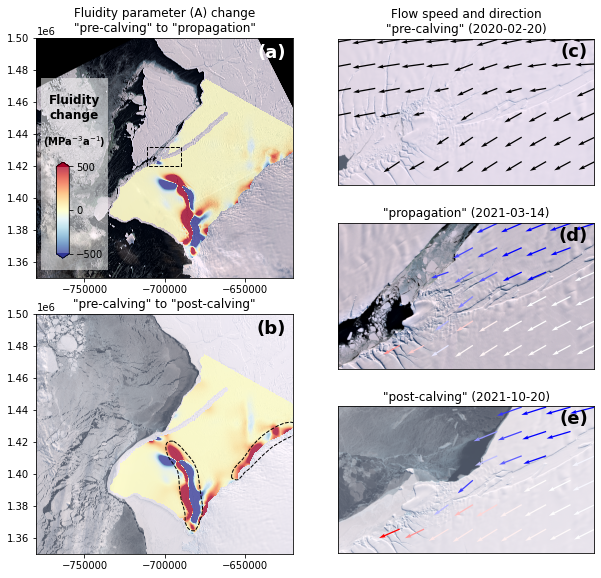

In [21]:
gr = 0.4
vvmin = 0
vvmax = 1200
    
Amin = -500
Amax = 500

xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

xmin_mir = -711000
xmax_mir = -690000 #18000+ wide
ymin_mir = 1420000 
ymax_mir = 1432000 #12000 tall

fig = plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(12, 12, wspace=10) #0.4)

#--------------------------------------------------

ang_diff_thres = 10
skip=75
mscale = 10000
mwidth = 0.005

mx = np.linspace(vel_pre_vx_open.transform[2],vel_pre_vx_open.transform[2]+(vel_pre_vx_open.transform[0]*np.shape(vel_pre_vx)[0]),num=np.shape(vel_pre_vx)[0])
my = np.linspace(vel_pre_vx_open.transform[5],vel_pre_vx_open.transform[5]+(vel_pre_vx_open.transform[4]*np.shape(vel_pre_vx)[1]),num=np.shape(vel_pre_vx)[1])
xmesh,ymesh = np.meshgrid(mx,my)

#--------------------------------------------------
    
orig_map=plt.cm.get_cmap('RdYlBu')
BuYlRd = orig_map.reversed()
    
ax12 = plt.subplot(gs[0:6,0:6])
hidden_A = ax12.imshow(fluid_calve_pre, cmap=BuYlRd, alpha=0.75, vmin=Amin, vmax=Amax)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax12)
show(fluid_calve_pre,ax=ax12,transform=fluid_pre_open.transform, cmap=BuYlRd, alpha=0.75,vmin=Amin,vmax=Amax)
    
ax12.add_patch(Rectangle((-777000,1355000),41500,120000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes12 = inset_axes(ax12, width="5%", height="40%",loc='lower left',borderpad=2)
cbar12 = plt.colorbar(hidden_A,cax=cbaxes12, ticks=[Amin,0,Amax],extend='both')        
ax12.annotate("Fluidity\nchange",(-775000+(37500/2),1465000),size=12,weight='bold',ha='center',va='top')
ax12.annotate("(MPa$^{-3}$a$^{-1}$)",(-775000+(37500/2),1440000),size=10,weight='bold',ha='center',va='top')

ax12.plot([xmin_mir,xmin_mir,xmax_mir,xmax_mir,xmin_mir],\
            [ymin_mir,ymax_mir,ymax_mir,ymin_mir,ymin_mir],\
            '--',color='k',linewidth=1)
  
ax13 = plt.subplot(gs[6:12,0:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax13)
show(fluid_post_pre,ax=ax13,transform=fluid_pre_open.transform, cmap=BuYlRd,alpha=0.75,vmin=Amin,vmax=Amax)

for feature in outline_C1["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)[0]
        ax13.plot(xs[:, 0], xs[:, 1], linewidth=1, color='k', linestyle='--')

for feature in outline_GZ["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)[0]
        ax13.plot(xs[:, 0], xs[:, 1], linewidth=1, color='k', linestyle='--')


#--------------------------------------------------
    
ax14 = plt.subplot(gs[0:4,6:12])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax14)

skip=20
Q_pre14 = ax14.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_pre_vx[ ::skip, ::skip], vel_pre_vy[ ::skip, ::skip],
                    scale = mscale, color='k', width= mwidth)
    
ax15 = plt.subplot(gs[4:8,6:12])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax15)

Q_calve15 = ax15.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_calve_vx[ ::skip, ::skip], vel_calve_vy[ ::skip, ::skip],
                    angle_calve_pre[ ::skip, ::skip], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                    scale = mscale, width= mwidth)

ax16 = plt.subplot(gs[8:12,6:12])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax16)

Q_post16 = ax16.quiver(xmesh[ ::skip, ::skip],ymesh[ ::skip, ::skip],
                    vel_post_vx[ ::skip, ::skip], vel_post_vy[ ::skip, ::skip],
                    angle_post_pre[ ::skip, ::skip], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                    scale = mscale, width= mwidth)
    
#--------------------------------------------------

ax12.set_xlim(xmin,xmax)
ax12.set_ylim(ymin,ymax)
ax12.locator_params(axis='x', nbins=3)
ax13.set_xlim(xmin,xmax)
ax13.set_ylim(ymin,ymax)
ax13.locator_params(axis='x', nbins=3)
ax14.set_xlim(xmin_mir,xmax_mir)
ax14.set_ylim(ymin_mir,ymax_mir)
ax15.set_xlim(xmin_mir,xmax_mir)
ax15.set_ylim(ymin_mir,ymax_mir)
ax16.set_xlim(xmin_mir,xmax_mir)
ax16.set_ylim(ymin_mir,ymax_mir)
    
ax14.set_xticks([])
ax14.set_yticks([])
ax15.set_xticks([])
ax15.set_yticks([])
ax16.set_xticks([])
ax16.set_yticks([])
    
ax12.annotate('(a)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax13.annotate('(b)',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
    
ax14.annotate('(c)',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')
ax15.annotate('(d)',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')
ax16.annotate('(e)',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')

ax12.set_title('Fluidity parameter (A) change\n"pre-calving" to "propagation"')
ax13.set_title('"pre-calving" to "post-calving"')
ax14.set_title('Flow speed and direction\n"pre-calving" (2020-02-20)')
ax15.set_title('"propagation" (2021-03-14)')
ax16.set_title('"post-calving" (2021-10-20)')

output = './figures/fig0X_model_fluid.png'
plt.savefig(output, dpi=100, bbox_inches='tight')

plt.show()
